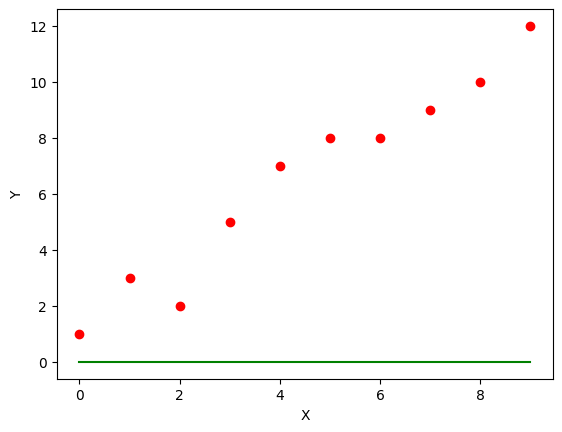

[+] iterations elapsed:  10000
[+] current accuracy:  0.905081583241574


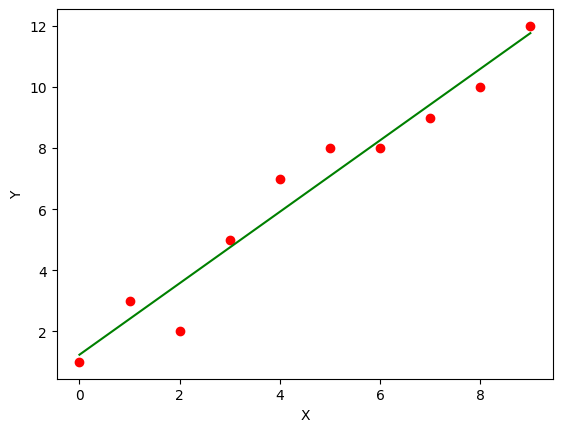

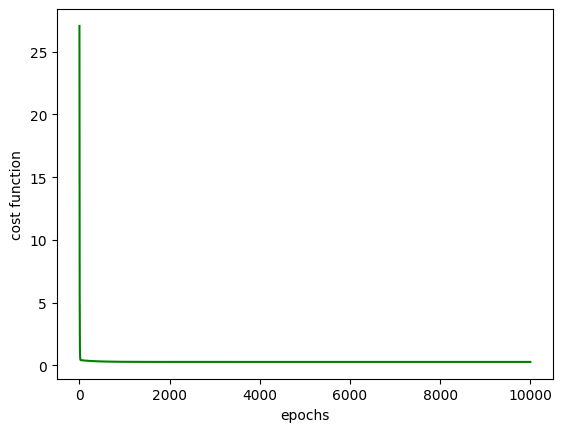

m:  1.1696970891288392
c:  1.2363628874558457
----------------------------------------------
Predicted Values:Actual Values 12.933333778744236 : 12
Predicted Values:Actual Values 14.103030867873077 : 13
Predicted Values:Actual Values 15.272727957001916 : 14
Predicted Values:Actual Values 16.442425046130754 : 15
Predicted Values:Actual Values 17.612122135259597 : 16
Predicted Values:Actual Values 18.781819224388435 : 17
Predicted Values:Actual Values 19.951516313517274 : 18
Predicted Values:Actual Values 21.121213402646113 : 19
Predicted Values:Actual Values 22.29091049177495 : 20
Predicted Values:Actual Values 23.46060758090379 : 21


In [33]:
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.m = 0
        self.c = 0

    def update_coeffs(self, alpha):
        Y_pred = np.array([])
        for x in self.X:
            Y_pred = np.append(Y_pred, self.c + self.m * x)
        n = len(self.Y)
        self.m = self.m - (alpha * ((1 / n) * np.sum((Y_pred - self.Y) * self.X)))
        self.c = self.c - (alpha * ((1 / n) * np.sum(Y_pred - self.Y)))

    def predict(self, X=None):
        Y_pred = np.array([])
        if X is None:
            X = self.X
        for x in X:
            Y_pred = np.append(Y_pred, self.c + self.m * x)
        return Y_pred

    def compute_cost(self, Y_pred):
        n = len(self.Y)
        J = (1 / (2 * n)) * np.sum((Y_pred - self.Y)**2)
        return J

    def plot_line(self, Y_pred, fig):
        f = plt.figure(fig)
        plt.scatter(self.X, self.Y, color='r')
        plt.plot(self.X, Y_pred, color='g')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

    def get_accuracy(self, Y_pred):
        y_p, y = Y_pred, self.Y
        n = len(Y_pred)
        absolute_errors = np.abs(y_p - y)
        mae = np.mean(absolute_errors)
        return 1 - mae / np.mean(y)


def main():
    X = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    reg = Linear_Regression(X, y)

    iter = 0
    epochs = 10000
    alpha = 0.005
    costs = []
    Y_pred = reg.predict()
    reg.plot_line(Y_pred, 'Initial Best Fit Line')
    while True: 
        Y_pred = reg.predict()
        cost = reg.compute_cost(Y_pred)
        costs.append(cost)
        reg.update_coeffs(alpha)
        iter += 1
        if iter % epochs == 0:
            print("[+] iterations elapsed: ", iter)
            print("[+] current accuracy: ", reg.get_accuracy(Y_pred))
            break
    reg.plot_line(Y_pred, 'Final Best Fit Line')
    h = plt.figure('best fit line')
    plt.plot(range(iter), costs, color='g')
    plt.xlabel('epochs')
    plt.ylabel('cost function')
    plt.show()
    print("m: ",reg.m)
    print("c: ",reg.c)

    print("----------------------------------------------")

    new_X = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
    predicted_values = reg.predict(new_X)
    actual_values = np.array([x+2 for x in new_X])

    # h=plt.figure('new line')
    # plt.scatter(new_X,actual_values)
    # plt.plot(new_X,predicted_values)
    # plt.xlabel('new X')
    # plt.ylabel('new Y')
    # plt.show()

    for i in range(len(actual_values)):
        print("Predicted Values:Actual Values", predicted_values[i],":",actual_values[i])

if __name__ == '__main__':
    main()